In [2]:
# Import modules
import numpy as np
import tensorflow as tf
import sys
import os.path
from time import time
from time import gmtime, strftime
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

from config import *

cwd = os.getcwd()

# Start an interactive session
sess = tf.InteractiveSession()

In [3]:
local_repo = home_dir + "18level" + '/'

# change to data directory
os.chdir(local_repo)

# Load Training/Testing Data
x = np.load('trData.npy')[:, :-1]
x_t = np.load('teData.npy')[:, :-1]
y = np.load('trData.npy')[:, -1].reshape((len(x), 1))
y_t = np.load('teData.npy')[:, -1].reshape((len(x_t), 1))
scale_params = pickle.load(open('scaleParams.p', 'rb'))

n_features = len(x.T)
n_targets = len(y.T)

In [9]:
# Create helper functions to build network

def weights(size, n):
    """Creates a weight tensor."""
    return tf.Variable(tf.random_normal(size, stddev=1.0/size[0]), name='W' + str(n))

def bias(size, n):
    """Creates a bias tensor"""
    return tf.Variable(tf.random_normal(size), name='b' + str(n))

def relu(s):
    """A lazy wrapper for the reulo function
    in tensorflow."""
    return tf.nn.relu(s)

def ff_layer(s, size, n, linear=False):
    """Take a signal s and return the activations of that layer."""
    w = weights(size, n)
    b = bias([size[0]], n)
    if linear == False:
        return relu(tf.matmul(s, w) + b)
    else:
        return tf.matmul(s, w) + b

In [10]:
# Create placeholders for the input 
# and the target
v = tf.placeholder(tf.float32, shape=[None, n_features])
z_ = tf.placeholder(tf.float32, shape=[None, n_targets])

In [11]:
# Initialize all tf variables
sess.run(tf.global_variables_initializer())

# This is our regression model
a1 = ff_layer(v, [n_features, 5], 1)
a2 = ff_layer(tmp, [5, 3], 2)
z = ff_layer(a2, [3, n_targets], 3, linear=True)

# Define a loss function
loss = tf.reduce_mean(tf.nn.l2_loss(z - z_))

ValueError: Dimensions must be equal, but are 5 and 8 for 'add_1' (op: 'Add') with input shapes: [?,5], [8].

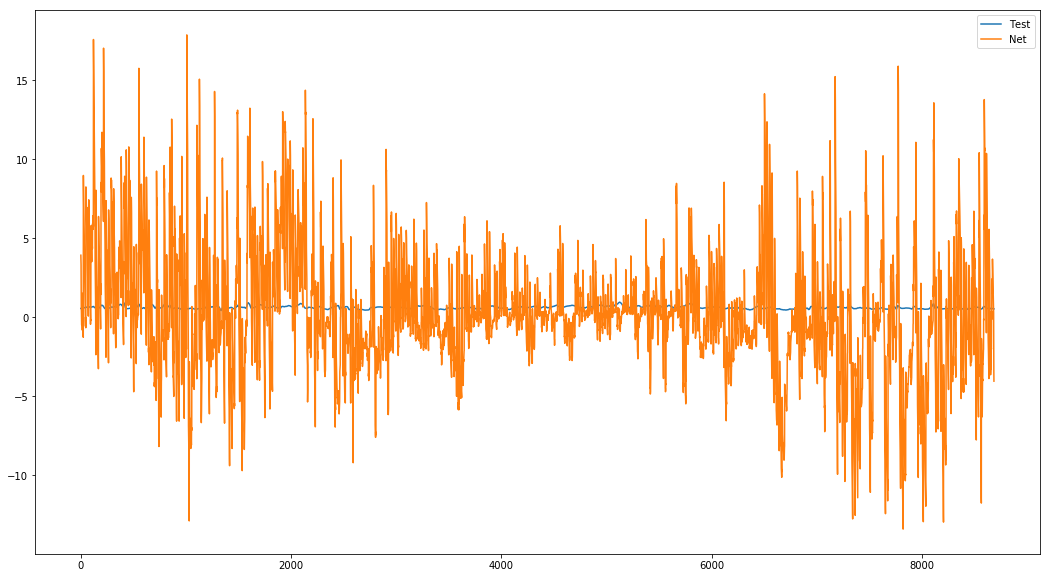

In [5]:
z1 = z.eval(feed_dict={v: x_t})
plt.figure(figsize=(18, 10))
plt.plot(y_t, label='Test')
plt.plot(z1, label='Net')
plt.legend()

In [6]:
# Train the model using gradient descent with a step size of 0.5
train_step = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

# Run training step multiple times to reduce loss
for i in range(len(x)):
    train_step.run(feed_dict={v: x[i, :].reshape((1, 8)), z_: y[i, :].reshape((1, 1))})

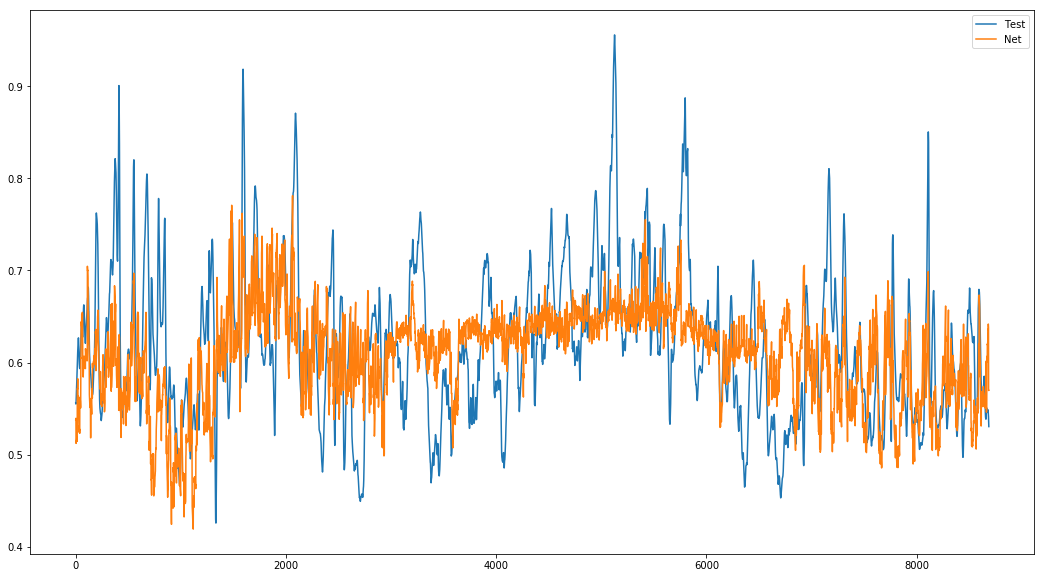

In [7]:
z2 = z.eval(feed_dict={v: x_t})
plt.figure(figsize=(18, 10))
plt.plot(y_t, label='Test')
plt.plot(z2, label='Net')
plt.legend()

In [8]:
e1 = loss.eval(feed_dict={v: x, z_: y})

In [9]:
e2 = loss.eval(feed_dict={v: x_t, z_: y_t})

In [10]:
print e1, e2

125.848 25.9999
